In [60]:
### This is a gene specific analysis notebook
from candidate_utils import *

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Gene-transcript dict
dict_name = pickle.load(open(os.path.join(dir_refs,'dict_name_forcov_062121.pkl'), 'rb'))

In [9]:
gene_name = 'CALR'

In [10]:
# Find transcript for the gene
for transcript,gene in dict_name.items():
    if gene == gene_name:
        print(transcript)

ENST00000316448


<span style="color:blue">**The histology subtypes of patients with the mutation**</span>.


In [35]:
df_str, df_num = get_num_str(gene_name)

In [36]:
df_str

,dcc_specimen_type,histology_tier3,histology_tier4,tumour_histological_type,tumour_stage,tumour_histological_comment,specimen_donor_treatment_type
syn,{'Primary tumour - solid tissue': 1},{'Adenocarcinoma': 1},{'Serous cystadenocarcinoma': 1},"{'Serous cystadenocarcinoma, NOS': 1}",{nan: 1},{nan: 1},{nan: 1}
all,{'Primary tumour - solid tissue': 44},{'Adenocarcinoma': 44},"{'Serous cystadenocarcinoma': 20, 'Adenocarcin...","{'Serous cystadenocarcinoma, NOS': 20, 'Endome...",{nan: 44},{nan: 44},{nan: 44}


In [37]:
df_num

SV.events  Coding.SNVs  Non.coding.SNVs  \
mut_status                                                   
syn        count    1.000000     1.000000         1.000000   
           mean   291.000000   165.000000     13512.000000   
           std           NaN          NaN              NaN   
           min    291.000000   165.000000     13512.000000   
           25%    291.000000   165.000000     13512.000000   
           50%    291.000000   165.000000     13512.000000   
           75%    291.000000   165.000000     13512.000000   
           max    291.000000   165.000000     13512.000000   
all        count   42.000000    44.000000        44.000000   
           mean   189.690476   177.386364     19950.659091   
           std    160.288382   301.980225     44733.102607   
           min      0.000000    25.000000      2585.000000   
           25%     47.500000    51.500000      4251.500000   
           50%    188.500000    70.000000      6734.000000   
           75%    281.750000   146.500000     15116.250000   
           max    794.000000  1510.000000    280752.000000   

                  CNA.events..do_not_use.  Retrotransposon.insertions  \
mut_status                                                              
syn        count                 1.000000                    1.000000   
           mean                919.000000                   11.000000   
           std                        NaN                         NaN   
           min                 919.000000                   11.000000   
           25%                 919.000000                   11.000000   
           50%                 919.000000                   11.000000   
           75%                 919.000000                   11.000000   
           max                 919.000000                   11.000000   
all        count                44.000000                   44.000000   
           mean                535.500000                   14.750000   
           std                 380.657112                   28.151686   
           min                  95.000000                    0.000000   
           25%                 188.250000                    2.000000   
           50%                 525.500000                    3.000000   
           75%                 732.250000                   11.500000   
           max                1772.000000                  141.000000   

                  Mitochondrial.mutations    all.Indels  
mut_status                                               
syn        count                 1.000000      1.000000  
           mean                  1.000000    538.000000  
           std                        NaN           NaN  
           min                   1.000000    538.000000  
           25%                   1.000000    538.000000  
           50%                   1.000000    538.000000  
           75%                   1.000000    538.000000  
           max                   1.000000    538.000000  
all        count                44.000000     44.000000  
           mean                  2.931818   4509.681818  
           std                   2.500211  13792.103413  
           min                   0.000000    285.000000  
           25%                   1.000000    435.750000  
           50%                   2.000000    511.500000  
           75%                   5.000000    745.250000  
           max                  10.000000  66618.000000

<span style="color:blue">**Mutation**</span>.


In [38]:
df_all, df_mut, donor_list = get_mut(gene_name)

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,17,24,28,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Total 43 patients
1 patients have synonymous mutations, they are: ['DO41217']
19:g.13051179C>T
19:g.13051188A>C
19:g.13051197T>G


In [39]:
df_all.loc[pd.IndexSlice[gene_name, :,donor_list],'Genome_Change']

Hugo_Symbol  Variant_Classification  Donor_ID
CALR         Silent                  DO41217     g.chr19:13051179C>T
                                     DO41217     g.chr19:13051188A>C
                                     DO41217     g.chr19:13051197T>G
             Missense_Mutation       DO41217     g.chr19:13051215A>C
Name: Genome_Change, dtype: object

<span style="color:blue">**CNV**</span>.


In [51]:
cnv = get_cnv(donor_list, gene_name)
cnv

,,,96f337d2-cec4-4484-87cd-ab2109d2bf50
Gene Symbol,Locus ID,Cytoband,
CALR,811,19p13.2,4.0


<span style="color:blue">**Expression PCAWG**</span>.


/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (1,17,24,28,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Number of normal patient: 1
Number of synonymous patients: 1
Number of other tumor patients:50


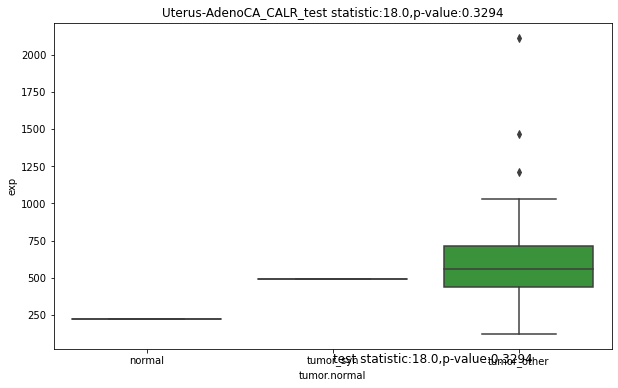

In [50]:
get_expression(gene_name)

<span style="color:blue">**CRISPR**</span>.


In [58]:
get_lineage(gene_name, 'Uterus')

['Endometrial Adenocarcinoma' 'Endometrial Adenosquamous'
 'Endometrial Stromal Sarcoma' 'MMMT' 'Choriocarcinoma'
 'Uterine Carcinosarcoma' 'Endometrial Squamous' 'Mullerian Carcinoma'
 'Clear Cell Carcinoma']


20 in histology subtype
969 not in histology subtype


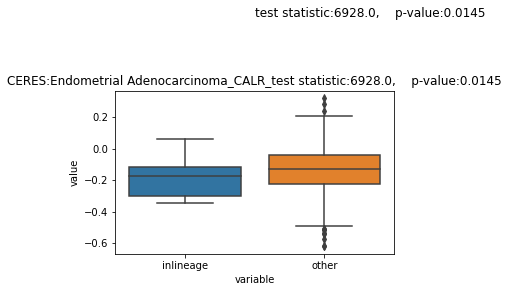

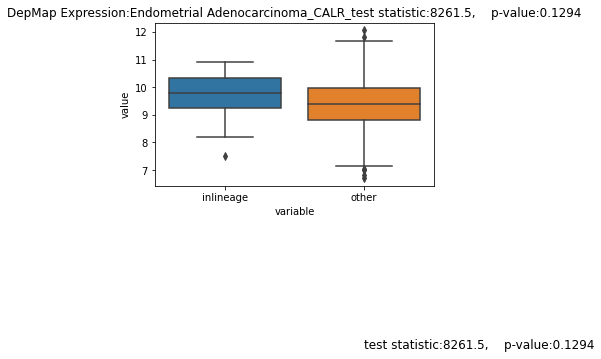

In [62]:
get_CERES(gene_name, 'Endometrial Adenocarcinoma')